<a href="https://colab.research.google.com/github/claragimenojesus/UG2_WRSE_2024-25/blob/main/Tutorial_2/Tutorial_CM2_IDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXERCISE 4.1 Creating a rainfall intensity-duration curve.**

In this tutorial you will be creating an intensity-duration curve (IDC) from precipitation time series. In hydrology, especially when it comes to flooding, not just the quantity of precipitation in a catchment matters, but also the timespan in which that precipitation occurs. In an urban environment, for example, a steady drizzle should not cause problems as the sewer capacity is sufficient to drain a steady rather low flow, but a short intense rainfall may cause local flooding if more water flows into the sewer than the system can carry off in a similar timespan - even if that intense spell has a smaller total depth than the daylong drizzle. This temporal distribution of precipitation is captured in IDCs. They represent, for a certain duration (x coordinate), the maximum intensity (averaged over that duration, y coordinate) which has been observed (or is expected); or conversely, the maximum time span (x coordinate) over which a certain intensity (averaged, y coordinate) has been observed (or is expected).

You will be working with the dataset in ex4_1.csv. This is a dataset with points in time, not precipitation depths. What does this mean? The data are raw data from a tipping bucket rain gauge which registers the time after each 0.2mm (in this case) of rainfall.

The very first step is to convert this to a time series of rainfall depths.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

First, let's load the data

In [5]:
csv_path = "https://raw.githubusercontent.com/claragimenojesus/UG2_WRSE_2024-25/refs/heads/main/Tutorial_2/data/ex4_1.csv"
buckets = pd.read_csv(csv_path, header=None).values.flatten()  # Assuming the data is in one column

Print the first 5 elements of the data

In [ ]:
print(buckets[:5])

['2014-08-10 18:37:13' '2014-08-10 19:51:58' '2014-08-10 20:31:28'
 '2014-08-10 20:35:34' '2014-08-10 20:39:30']


We need to aggregate this to 5 minute intervals. Let's refer to them with indices, taking 2014-08-10 18:35 as a reference. The index then indicates the number of 5min intervals expired since that reference point in time.


In [ ]:
reftime = pd.to_datetime("2014-08-10 18:35:00")

We then create 5-minute chunks

In [ ]:
(buckets_datetime - reftime)

TimedeltaIndex([  '0 days 00:02:13',   '0 days 01:16:58',   '0 days 01:56:28',
                  '0 days 02:00:34',   '0 days 02:04:30',   '0 days 02:11:12',
                  '0 days 02:16:48',   '0 days 02:30:26',   '0 days 02:54:41',
                  '4 days 21:25:26',
                ...
                '875 days 23:41:33', '875 days 23:47:47', '875 days 23:54:58',
                '875 days 23:58:55', '876 days 00:05:44', '876 days 00:10:03',
                '876 days 00:17:28', '876 days 00:26:46', '876 days 00:54:07',
                '876 days 02:01:00'],
               dtype='timedelta64[ns]', length=5802, freq=None)

In [ ]:
buckets_datetime = pd.to_datetime(buckets)

# Calculate 5-minute chunks (in terms of 5-minute intervals since reftime)
buckets_5minchunks = ((buckets_datetime - reftime).total_seconds() // 300).astype(int) # note 5min=5*60=300s
buckets_5minchunks

Int64Index([     0,     15,     23,     24,     24,     26,     27,     30,
                34,   1409,
            ...
            252284, 252285, 252286, 252287, 252289, 252290, 252291, 252293,
            252298, 252312],
           dtype='int64', length=5802)

Note the factor - here we convert the timedelta object stored as default in nanoseconds to seconds. The "//" carries out integer division. The output of this operator will be the quotient rounded off to the closest whole number.


Now sum the ticks in each 5-minute block, each representing 0.2mm of depth.\
The numpy bincount function counts the number of occurences of each value in array of non-negative ints.

In [ ]:
precip = np.bincount(buckets_5minchunks, weights=np.full(len(buckets_5minchunks), 0.2))
precip[0:20] # you can check the values by printing the precip array. You will see that 0.2 mm depth of precipitation are recorded for the first index (0), index=15 and so on

array([0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.2, 0. , 0. , 0. , 0. ])

Next create the corresponding time series. Remember that in precipitation time series, the precipitation is reported along with the time after it came down.

In [ ]:
time = reftime + pd.to_timedelta(np.arange(1,len(precip)+1) * 5, unit='min')
time

DatetimeIndex(['2014-08-10 18:40:00', '2014-08-10 18:45:00',
               '2014-08-10 18:50:00', '2014-08-10 18:55:00',
               '2014-08-10 19:00:00', '2014-08-10 19:05:00',
               '2014-08-10 19:10:00', '2014-08-10 19:15:00',
               '2014-08-10 19:20:00', '2014-08-10 19:25:00',
               ...
               '2017-01-02 19:55:00', '2017-01-02 20:00:00',
               '2017-01-02 20:05:00', '2017-01-02 20:10:00',
               '2017-01-02 20:15:00', '2017-01-02 20:20:00',
               '2017-01-02 20:25:00', '2017-01-02 20:30:00',
               '2017-01-02 20:35:00', '2017-01-02 20:40:00'],
              dtype='datetime64[ns]', length=252313, freq=None)

Now plot the timeseries as a bar plot

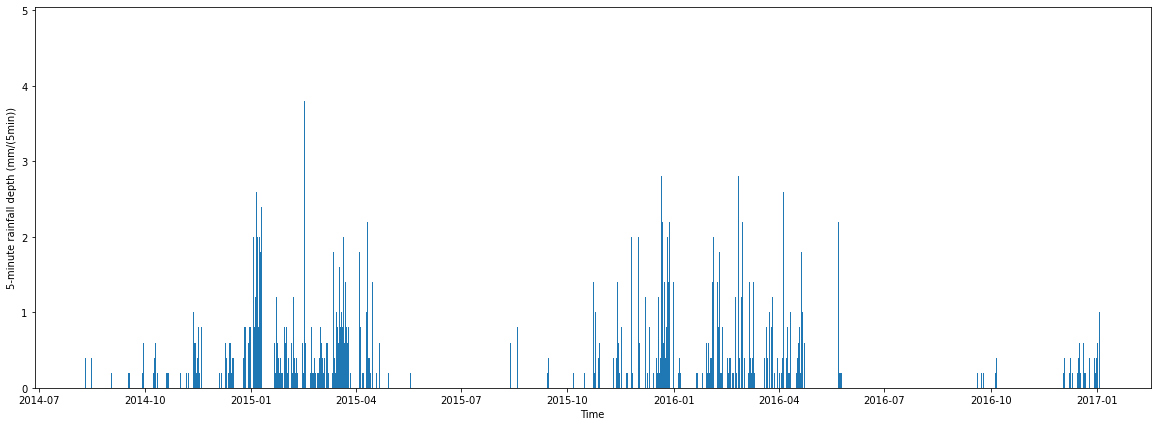

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(time, precip)
plt.xlabel('Time')
plt.ylabel('5-minute rainfall depth (mm/(5min))')
plt.show()

This plot is not very clear: a great many low precipitation depths. For clarity, let's aggregate to days. From the times array, create an equally long array, keeping only the (next) day information

In [ ]:
time_day = (time + pd.Timedelta(days=1)).floor('D')
time_day

DatetimeIndex(['2014-08-11', '2014-08-11', '2014-08-11', '2014-08-11',
               '2014-08-11', '2014-08-11', '2014-08-11', '2014-08-11',
               '2014-08-11', '2014-08-11',
               ...
               '2017-01-03', '2017-01-03', '2017-01-03', '2017-01-03',
               '2017-01-03', '2017-01-03', '2017-01-03', '2017-01-03',
               '2017-01-03', '2017-01-03'],
              dtype='datetime64[ns]', length=252313, freq=None)

Extract unique days, and their indices where 0 corresponds to the first day

In [ ]:
days, day_indices = np.unique(time_day, return_inverse=True)

And sum the precipitation per day index

In [ ]:
precip_daily = np.bincount(day_indices, weights=precip)

Now we plot again

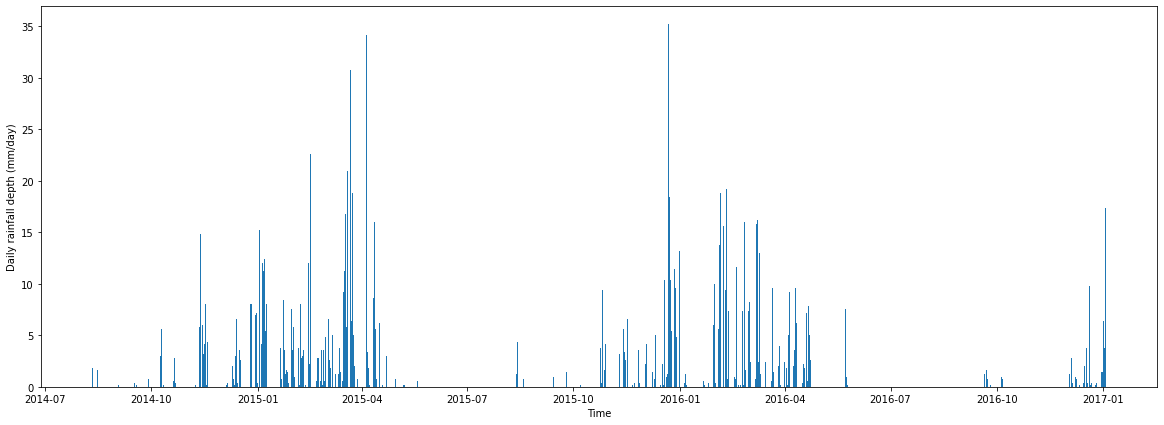

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(days, precip_daily)
plt.xlabel('Time')
plt.ylabel('Daily rainfall depth (mm/day)')
plt.show()

This is a lot clearer!

Now it is time to construct the intensity-duration curve. The approach you will take is to, as it were, slide time windows of different 'widths' (durations, in your case multiples of the 5-minute time base) across the entire time series, summing the precipitation depths in the window. This will lead to an array for each duration. The next step is to take the maximum (summed) depth for each duration, and then to divide that by the duration to get the intensity. In IDCs, duration is often expressed in hours, and intensity in mm/h.

**TASK: create a vector of durations expressed as multiples of 5min, ranging from 5min to 72h (3 days)**

In [ ]:
durations = np.arange(1, 72 * 12 + 1)

**TASK: initialize the intensities array, for e.g. with zeros**

In [ ]:
intensities = np.zeros(len(durations))

**TASK: For each duration, find the maximum total depth over the rainfall series**\
Do this by 'sliding' a window across te time series, for each duration, taking the maximum for each.\
TIP: you can program the sliding window with loops

In [ ]:
for i in range(len(durations)):
    window_depths = pd.Series(precip).rolling(window=durations[i]).sum()  # Total depth for each sliding window
    max_depth = window_depths.max()  # Maximum across windows
    intensities[i] = max_depth / durations[i] * 12  # Convert to mm/h


Now plot the IDC curve. Often, the x-axis (duration) is logarithmic.

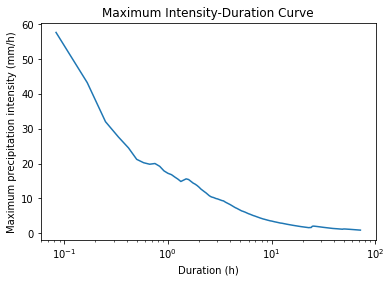

In [ ]:
plt.figure()
plt.semilogx(durations / 12, intensities)
plt.xlabel('Duration (h)')
plt.ylabel('Maximum precipitation intensity (mm/h)')
plt.title('Maximum Intensity-Duration Curve')
plt.show()

NOTE: should the curve not decrease monotonically towards longer durations? This is what we'd expect: after all, if a 5h storm has an average intensity of 10mm/h, wouldn't any 4h subset of that storm have an intensity of at least 10mm/h?\

ANSWER: Not necessarily, as you are dealing with observed rainfall series and average intensities. As an example, take a 3h storm, with hourly intensities of 2mm/h, 1mm/h and 2mm/h, respectively. The maximum (average) intensity for a 2h duration as observed is 1.5mm/h, but for 3h it is (5/3)mm/h=1.67mm/h > 1.5mm/h. This is because the storm intensity fluctuates, and this would not have occurred had the intensities been 2mm/h, 1mm/h and then 1mm/h. The non-monotonicity is an artefact of the data and of the empirical approach.